In [7]:
import numpy as np
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import utils
import sys


#Loads Training Data
data =  np.loadtxt('../data/random_canon_r5_c5.csv',dtype = float, delimiter = ',')
#names = data[0]
#data = data[1:]


#Loads Extra SUSP data to increase class percentage
extraSUSPs = np.loadtxt('../data/random_canon_SUSPs_r5_c5.csv',dtype = float, delimiter = ',')
#extraSUSPs = extraSUSPs[1:]

data45 =  np.loadtxt('../data/random_canon_r4_c5.csv',dtype = float, delimiter = ',')
extraSUSPs45 = np.loadtxt('../data/random_canon_SUSPs_r4_c5.csv',dtype = float, delimiter = ',')


#Creates one dataset
data = np.concatenate([data, extraSUSPs])
data45 = np.concatenate([data45, extraSUSPs45])

data = data[:,1:]

data = np.concatenate([data, data45])

#Sets class data to y
y = data[:,-1]

#Choosing which features to include in X data
#X = data[:,8:-1]
print(data[0])

X = data[:,4:-1]


#X = X.astype(np.float)
y = utils.to_categorical(y) #Done to make categorical loss functions work
print(y)

print(X[0])

#le = preprocessing.LabelEncoder()

#for i in range(ROWS+COLUMNS):
#    X[:,i] = le.fit_transform(X[:,i])

#cat_features = [0, 1, 2, 3 ,4 ,5 ,6 ,7 ,8 ,9]
#enc = preprocessing.OneHotEncoder(categorical_features=cat_features)
#enc.fit(X)

#print(enc.n_values_)
#print(enc.feature_indices_)
#X = enc.transform(X).toarray()
#print(X[0])


#Creates a testing and training split that is stratified
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(len(x_train))
print(len(x_test))


[1.2133e+04 2.3321e+04 3.2133e+04 2.3333e+04 4.4000e-01 3.2000e-01
 2.4000e-01 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000

In [2]:
%matplotlib inline
"""
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE


# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
#models.append(('KN5', KNeighborsClassifier()))  # Too Slow commented out
#models.append(('KN7', KNeighborsClassifier(n_neighbors=7)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('LIN', SVC(kernel='linear',gamma='auto')))
#models.append(('RF',RandomForestClassifier(n_estimators=100)))

# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

results = []
classifiers = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	classifiers.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

    
    
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(classifiers)
plt.show()

#print('\n***Performing t-tests***\n\n')

    
#ttest,pval = stats.ttest_rel(results[0], results[1])
#print('P-Val between ZeroR and Logistic Regression: %.2f' % pval)

#if pval<0.05:
#    print("reject null hypothesis")
#else:
#    print("accept null hypothesis") 

#print()    

"""


'\nimport matplotlib.pyplot as plt\nfrom scipy import stats\n\nfrom sklearn import model_selection\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.svm import SVC\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.dummy import DummyClassifier\nfrom sklearn.feature_selection import RFE\n\n\n# prepare configuration for cross validation test harness\nseed = 1\n\n# prepare models\nmodels = []\nmodels.append((\'ZR\', DummyClassifier(strategy="most_frequent")))\nmodels.append((\'LR\', LogisticRegression(solver=\'liblinear\')))\n#models.append((\'KN5\', KNeighborsClassifier()))  # Too Slow commented out\n#models.append((\'KN7\', KNeighborsClassifier(n_neighbors=7)))\nmodels.append((\'DT\', DecisionT

Num of Features:  147
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 192)               28416     
_________________________________________________________________
dense_16 (Dense)             (None, 192)               37056     
_________________________________________________________________
dropout_11 (Dropout)         (None, 192)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 192)               37056     
_________________________________________________________________
dropout_12 (Dropout)         (None, 192)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 192)               37056     
_________________________________________________________________
dropout_13 (Dropout)         (None, 192)              

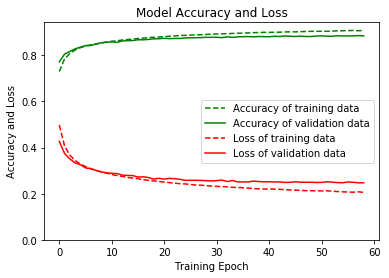


--- Check against test data ---

100000/100000 [==============================] - 3s 33us/step

Accuracy on test data: 0.88

Loss on test data: 0.25


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import Dropout
from matplotlib import pyplot as plt
from keras import optimizers
import keras

numFeatures = len(X[0])
print("Num of Features: ", numFeatures)


DropoutAmount = 0.3
NodesPerLayer= int((DropoutAmount*numFeatures)) + numFeatures + 1

model_m = Sequential()
model_m.add(Dense(NodesPerLayer, activation='relu', input_shape=(numFeatures,)))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(2, activation='softmax'))
print(model_m.summary())


callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=2)
]

opt = optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_m.compile(loss='binary_crossentropy',
                optimizer=opt, metrics=['accuracy'])

BATCH_SIZE = 475
EPOCHS = 200

history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)


print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

print("\n--- Check against test data ---\n")


#8 by 5, 9 by 5

score = model_m.evaluate(x_test, y_test, verbose=1)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])


In [20]:
total = len(x_test)
suspNum = 0

for instance in y_test:
    if instance[1] == 1:
        suspNum += 1

nonSUSPNum = total - suspNum
print("Baseline: ", nonSUSPNum/total)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

147


In [23]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import time

modelName = "5-5_and_4-5.h5"

data =  np.loadtxt('../data/canon_r3_c3.csv',dtype = float, delimiter = ',')
#names = data[0]
#data = data[1:]

#Sets class data to y
y_test = data[:,-1]
#Choosing which features to include in X data Must be same as trained above
x_test = data[:,3:-1]

y_test = keras.utils.to_categorical(y_test) 


model = load_model(modelName)
model.summary()

first = time.time()

score = model_m.evaluate(x_test, y_test, verbose=1)

end = time.time()

total = end - first

y_pred = model_m.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()

print("True Positives: ", tp)
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)


suspNum = 0

for instance in y_test:
    if instance[1] == 1:
        suspNum += 1

print("\nRecall: %0.3f" % (tp/(tp+fn)))
print("Precision: %0.3f" % (tp/(tp+fp)))

print("Accuracy on test data: %0.3f" % score[1])
print("\nLoss on test data: %0.3f" % score[0])

print("Total Time: ", total)
print("Time Per: ", total/len(X))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 192)               28416     
_________________________________________________________________
dense_16 (Dense)             (None, 192)               37056     
_________________________________________________________________
dropout_11 (Dropout)         (None, 192)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 192)               37056     
_________________________________________________________________
dropout_12 (Dropout)         (None, 192)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 192)               37056     
_________________________________________________________________
dropout_13 (Dropout)         (None, 192)               0         
__________